In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import numpy as np
#from ipynb.fs.full.AppProcessing import *
from itertools import zip_longest
import itertools as itertools

# app produces the package ID as part of the csv 

In [90]:
    
def prepareCsvForPkgId(input_file):
    """
    Input:
        file (string): Is a csv produced by the app after 11.09.2020 containing info on the package ID. 
    Returns:
        file (dataframe): A kind of cleaned dataframe with an evenly space timestamp as index 
        ids (list): A list with the package ids as ints
        filename (string): The name of the experiment (if the name given from the app, inclusing the timestamp) was used)
    """
    file = pd.read_csv(input_file)
    file = file.iloc[1:]
    file.columns = file.iloc[0]

    file = file[1:].apply(pd.to_numeric, errors='ignore')

    # to evenly set the timestamps 
    length = len(file.index) # length of dataframe
    stop = length*4 # stop point 
    index_evenly = np.linspace(0, stop, num = length, endpoint = False) # to adapt timestamp  
    file.loc[:,"Time"] = index_evenly #set the time as index, relevant for later plotting
    #print(index_evenly)
    #print(file.index.tolist())
    ids= file.index.tolist() # these are all the package ids (as strings because, yes pandas of course we want that as strings, strings are soooo useful..Not)
    ids = [int(one_id) for one_id in ids] # now they are ints
    #print(ids)

    file.set_index('Time', inplace=True)
    # 
    filename = input_file[20:-4]
    return file, ids, filename, index_evenly # no idea why, but the name of the index still includes "Pkg ID", the id not actually the index. Time is .. 



def grouper(iterable, n, fillvalue=None): # copied from StackOverflow
    '''
    Mostly Copied from StackOverflow. Takes a list and devided it into chunks of length n.
    Returns:
        toReturn: A list containing lists of length n
    '''
    args = [iter(iterable)] * n
    toReturn = list(zip_longest(*args, fillvalue=fillvalue)) # includes now the data types I want to work with (namely list of lists)
    toReturn = [list(oneChunk) for oneChunk in toReturn] # because one cannot turn tuples into sets. 
    return toReturn

The plan is to devide the list of Package Ids into chunks of 16. In a best case scenario, each chunk should contain all 16 values, if not, some Id was dropped. Find out how many chunks are incomplete. This approach is not perfect as extracting the exact info which id/how many pkgs/where the id is missing is not given but plotting the general area of a missed package should suffice. We'll see 

In [89]:
#perfectSet ={1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 0} # this would be a complete set
perfectSet = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} # this is a perfect set for Marc
result_dict = {"Name": [], "Total": [], "Complete": [], "Ratio":[]} # to later save the results
result_df = pd.DataFrame(data=result_dict)
#result_df= result_df.append({"Name": 1, "Total": 2, "Complete": 3, "Ratio": 4}, ignore_index= True) # for testing and trying


def evalCompleteness(IdChunkList, filename):
    '''
    Checks whether the individual chunks contain all package ids and are hence a complete set where nothing was dropped.
    Prints out a summary and saves the results in a dataframe (result_df)
    Input:
        chunklist(list of list): The list created by grouper
        filename (string): The name of the experiment, as produced by prepareCsvForPkgId() 
    '''
    ratio = []
    for chunk in IdChunkList:
        isSet = perfectSet.issubset(set(chunk))
        ratio.append(isSet)
        #print(isSet)
    total = len(ratio)-1 # -1 because the last one usually is never complete
    complete = sum(ratio)
    ratio_abs = complete/total
    print("Of {} chunks, {} contain all package Ids. The complete to incomplete ratio of the experiment ~{}~ is: {}.".format(total, complete, filename, ratio_abs))
    global result_df
    result_df = result_df.append({"Name": filename, "Total": total, "Complete": complete, "Ratio": ratio_abs}, ignore_index= True, verify_integrity=True)
    result_df.drop_duplicates(inplace=True) # clean that df
    
def analyseMissingAppPackages(filestring):
    '''
    Function combines all steps of analysing missing packages that are dropped by the app  
    Input:
        filestring (string): The name of the file to be analysed, has to be in same directory
    '''
    
    file_df, ids_list, filename_string, index = prepareCsvForPkgId(filestring)
    IdChunkList = grouper(ids_list, 16, 20) # 20 is just a random number bigger than the largest value in set (to fill the last set )
    evalCompleteness(IdChunkList, filename_string)
    



In [91]:
#path = os.getcwd()
#os.chdir(path)
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

print(all_csv) # to make sure we have all files 

for each_file in all_csv:
    if each_file != "01-09-2020_13-52-54_longTestApp.csv":
        analyseMissingAppPackages(each_file)

result_df

['01-09-2020_13-52-54_longTestApp.csv', '02-09-2020_15-24-42_test.csv', '14-10-2018_00-14-15_Exp1.1.csv', '14-10-2018_00-15-02_Exp1.2.csv', '16-09-2020_13-49-12_Exp2.1.csv', '16-09-2020_13-50-37_Exp2.2.csv', '16-09-2020_13-54-30_Exp3.1.csv', '16-09-2020_13-55-26_Exp3.2.csv', '16-09-2020_14-14-36_Exp4.2.csv', '16-09-2020_14-15-34_Exp4.1.csv']
Of 138 chunks, 0 contain all package Ids. The complete to incomplete ratio of the experiment ~test~ is: 0.0.
Of 469 chunks, 0 contain all package Ids. The complete to incomplete ratio of the experiment ~Exp1.1~ is: 0.0.
Of 445 chunks, 0 contain all package Ids. The complete to incomplete ratio of the experiment ~Exp1.2~ is: 0.0.
Of 484 chunks, 0 contain all package Ids. The complete to incomplete ratio of the experiment ~Exp2.1~ is: 0.0.
Of 444 chunks, 0 contain all package Ids. The complete to incomplete ratio of the experiment ~Exp2.2~ is: 0.0.
Of 524 chunks, 0 contain all package Ids. The complete to incomplete ratio of the experiment ~Exp3.1~ i

,Name,Total,Complete,Ratio
0,test,138.0,0.0,0.000000
1,Exp1.1,469.0,0.0,0.000000
2,Exp1.2,445.0,0.0,0.000000
3,Exp2.1,484.0,0.0,0.000000
4,Exp2.2,444.0,0.0,0.000000
5,Exp3.1,524.0,0.0,0.000000
6,Exp3.2,530.0,0.0,0.000000
7,Exp4.2,458.0,454.0,0.991266
8,Exp4.1,648.0,642.0,0.990741


In [13]:
def plotTraceApp(df, channelname = ["Ch-1","Ch-2","Ch-3","Ch-4","Ch-5","Ch-6"], fro = 0, to = 1000, sec=False, title = "Experiment", save = False, saveas = "Experiment"):
    """
    Plots the trace from individual Traumschreiber channels. 
    --------------
    Parameter:
    df: a cleaned up dataframe containing the app output
    channelname: the channelname to be displayed (default all, select subset if required) 
    fro (int): Starting point to plot the trace (in msec). If that msec does not correspond to a measurement, the closest one is used 
    to (int): End of the plot in msec. If that msec does not correspond to a measurement, the closest one is used instead.
    sec (boolean): If index is in seconds (specified in tidyTSAppOutput), the axis label is changed 
    title: Title of the plot
    save (boolean): True if plot shall be saved (in working directory) as png
    saveas (string): Name of the saved file
    """
    
    try: #find the nearest timestamp (only possible when index is unique)
        start = df.index.get_loc(fro, method = "nearest")
        stop = df.index.get_loc(to, method = "nearest")
        
    except: #if the data is not evenly spaced, there might be dublicated timestamps. Hack-around required
        # assuming the start/end point is given in msec (specified in function description). 
        # In average there should be a new measurement every 4 msec (sampling rate 250 Hz).
        # We calculate the indices that roughly correspond to the desired starting and stopping msecs instead
        samplingInterval = 4 
        start = int(fro/samplingInterval)
        stop = int(to/samplingInterval) 
    toPlot = df.iloc[start:stop] # cut only relevant part of dataframe for plotting
    
    #to do: count # channels to be plotted and automatically adapt plot size
    
    toPlot.plot(y = channelname, grid = True, title = title, sharex = False, marker='o', figsize = (30,6), subplots = True) #removed figsize

    if sec:
        plt.xlabel('Seconds')
    else:
        plt.xlabel("msec")
    plt.ylabel("mVolt")
     
    if save:    
        plt.savefig(saveas+'.png') # saves as .png at the moment as was better for displaying/discussing in slack
    plt.show()

Experiment 4 was condcuted with Marc's, the newer version of the app has a differnt pkg id naming system (signed vs unsigned). Weirdly, some packages where not complete. 

In [69]:
def differenceToNextMeasurement(dataframe, title, cut = False):
    """
    Requires a cleaned up (icluding pkg id) version of an dataframe. Plots only Channel 1 at the moment
    """
    dataframe = dataframe.drop(["Ch-2","Ch-3","Ch-4","Ch-5","Ch-6","Ch-7","Ch-8"], axis=1).dropna(axis=1) 
    
    if cut:
        diff_cut = dataframe.diff(axis=0).abs()
        #print(diff)
        diff_cut = diff_cut[(diff_cut <3.7).any(1)]
        #print(diff)
        #print(app.index.tolist())
        #print()
        axis = diff_cut.index.tolist()
        yaxis = diff_cut["Ch-1"].abs().tolist()
        plt.scatter(x = axis, y = yaxis)
        plt.grid()
        plt.rcParams["figure.figsize"] = (10,7)
        plt.xlabel("Time in msecs")
        plt.ylabel("Absolut difference to next measurement")
        plt.title(title+" Difference to neighbouring measurement, only displaying differences <3.7")
        #plt.savefig(title+"DifferencesWithThreshold.png")
        plt.show()
        
    else:
        diff = dataframe.diff(axis=0)
        axis = dataframe.index.tolist()
        yaxis = diff["Ch-1"].abs().tolist()
        plt.scatter(x = axis, y = yaxis)
        plt.grid()
        plt.rcParams["figure.figsize"] = (10,7)
        plt.xlabel("Time in msecs")
        plt.ylabel("Absolut difference to next measurement")
        plt.title(title+" Difference to neighbouring measurement")
        #plt.savefig(title+"Differences.png")

        plt.show()


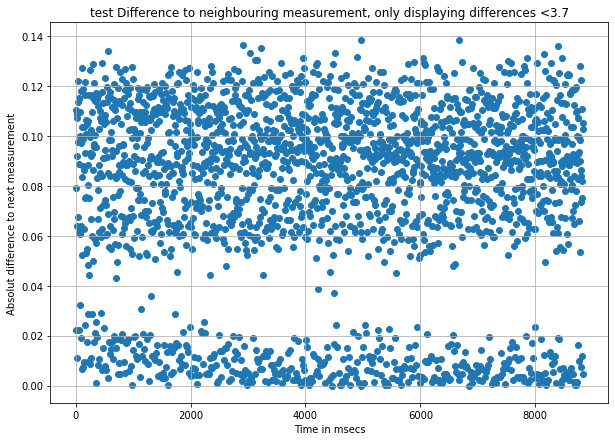

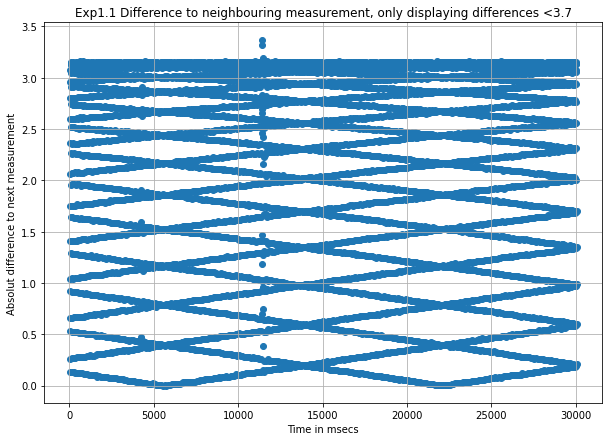

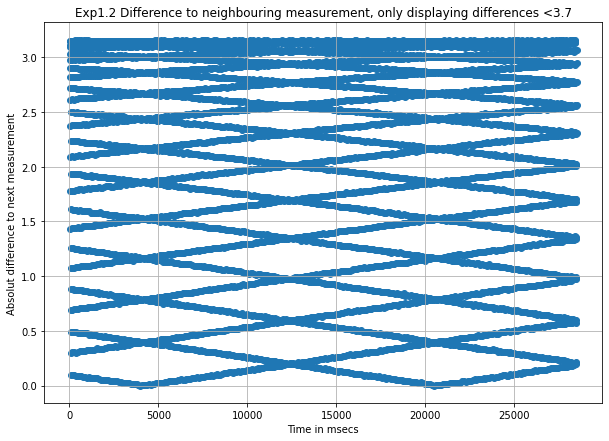

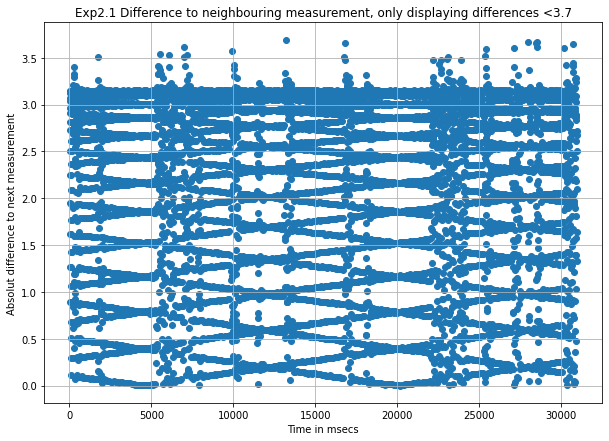

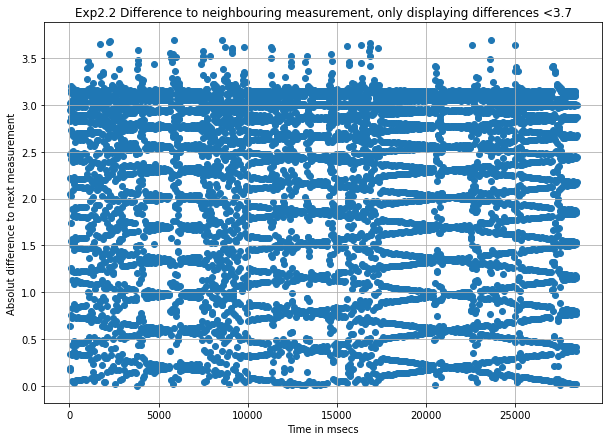

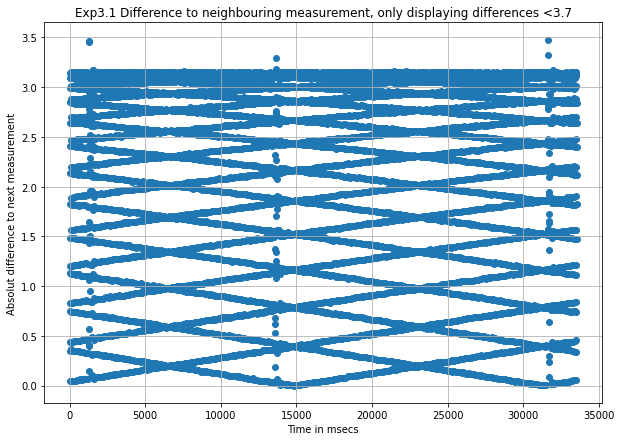

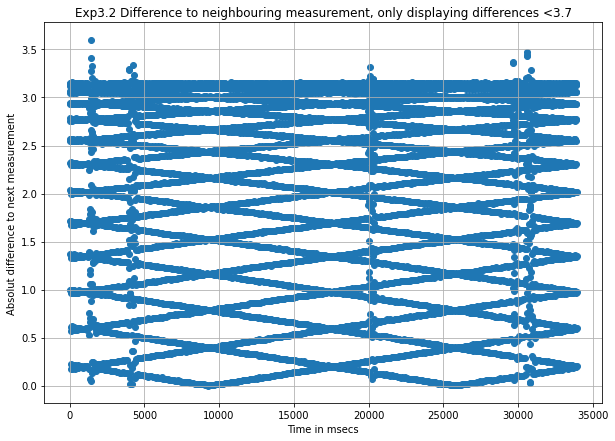

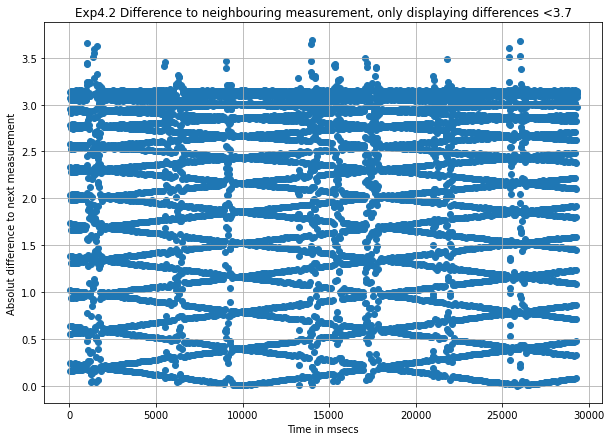

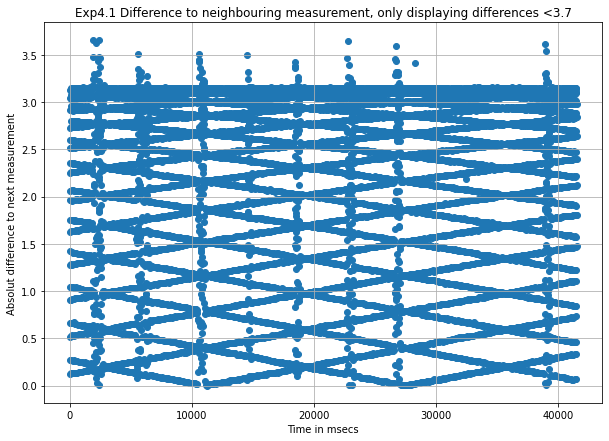

In [70]:

# for each_file in all_csv:
#     file_df, ids_list, filename_string = prepareCsvForPkgId(each_file)
#     #differenceToNextMeasurement(file_df, filename_string)
#     differenceToNextMeasurement(file_df, filename_string, cut = True)

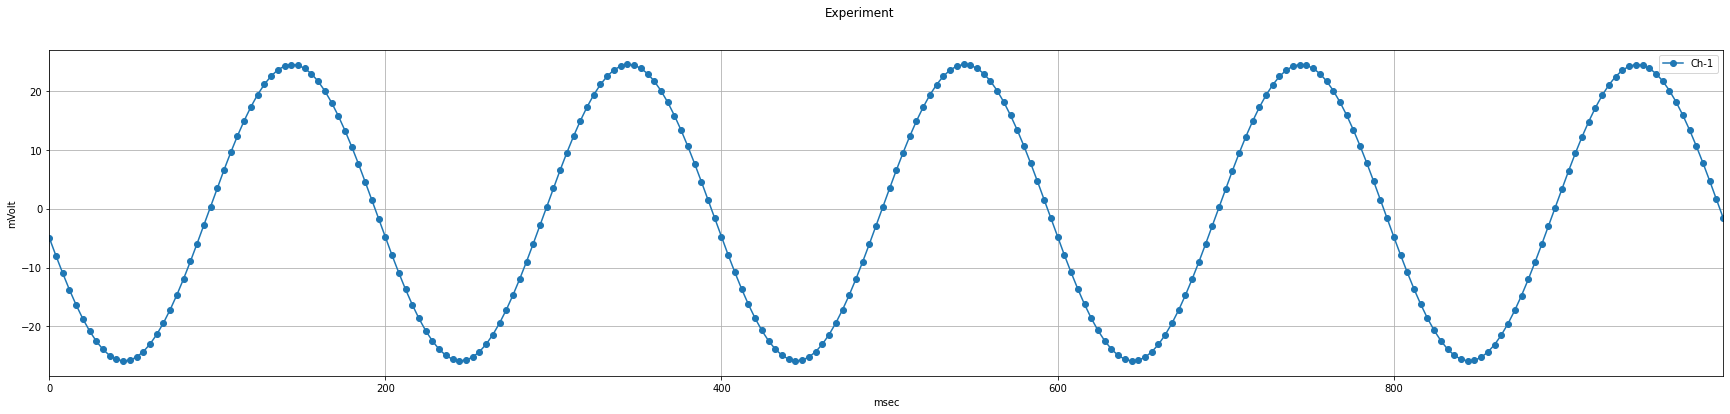

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188. 192. 196. 200. 204. 208. 212. 216. 220.
 224. 228. 232. 236. 240. 244. 248. 252. 256. 260. 264. 268. 272. 276.
 280. 284. 288. 292. 296. 300. 304. 308. 312. 316. 320. 324. 328. 332.
 336. 340. 344. 348. 352. 356. 360. 364. 368. 372. 376. 380. 384. 388.
 392. 396.]


In [128]:
# Get x values of the sine wave

file = prepareCsvForPkgId("14-10-2018_00-14-15_Exp1.1.csv")[0]
time = prepareCsvForPkgId("14-10-2018_00-14-15_Exp1.1.csv")[3]

plotTraceApp(file, channelname = ["Ch-1"])

file = file.iloc[0:1000]
time_short = time[0:1000]



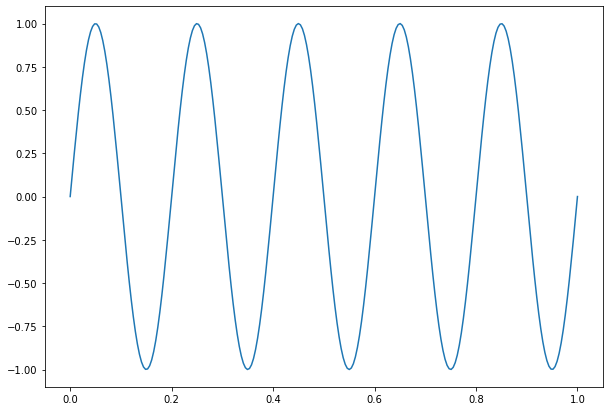

In [143]:

F = 5
T = 5/F
Fs = 250
Ts = 1./Fs
N = int(T/Ts)

t = np.linspace(0, T, N)
signal = np.sin(2*np.pi*F*t)

plt.plot(t, signal)
plt.show()